<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Algorithm" data-toc-modified-id="Decision-Tree-Algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decision Tree Algorithm</a></span><ul class="toc-item"><li><span><a href="#Gini-Impurity" data-toc-modified-id="Gini-Impurity-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gini Impurity</a></span></li><li><span><a href="#Entropy" data-toc-modified-id="Entropy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Entropy</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Gini-Index" data-toc-modified-id="Gini-Index-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gini Index</a></span></li><li><span><a href="#Entropy" data-toc-modified-id="Entropy-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Entropy</a></span></li></ul></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Neural-network" data-toc-modified-id="Neural-network-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Neural network</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import pydicom
from sklearn.metrics import roc_auc_score
from copy import deepcopy
from sklearn.utils import shuffle

In [2]:
#Import the true set dataset
ts = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/Database/TrueSet.csv')
display(ts)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,Entropy
0,1.0,1.0,0.0,1.0,33.343689,0.504963,0.988488,0.976670,0.988266,0.604986,0.167355
1,1.0,1.0,45.0,1.0,33.761907,0.504790,0.988270,0.976184,0.988020,0.601583,0.167355
2,1.0,1.0,90.0,1.0,33.853064,0.504749,0.988630,0.976700,0.988281,0.598952,0.167355
3,1.0,1.0,135.0,1.0,33.235679,0.505928,0.988263,0.976153,0.988005,0.607793,0.167355
4,1.0,1.0,0.0,2.0,34.930887,0.526944,0.988034,0.975636,0.987743,0.587795,0.167355
...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135.0,2.0,74.172211,0.996355,0.979663,0.958999,0.979285,0.663702,0.279801
1316,4.0,58.0,0.0,3.0,82.000896,1.083436,0.978642,0.956995,0.978261,0.629656,0.279801
1317,4.0,58.0,45.0,3.0,78.950834,1.052204,0.978875,0.957253,0.978393,0.644799,0.279801
1318,4.0,58.0,90.0,3.0,83.111228,1.067657,0.978810,0.957206,0.978369,0.624641,0.279801


In [3]:
ts['Cancer'] = 1
ts.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(ts)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy,Cancer
0,33.343689,0.504963,0.988488,0.988266,0.604986,0.167355,1
1,33.761907,0.504790,0.988270,0.988020,0.601583,0.167355,1
2,33.853064,0.504749,0.988630,0.988281,0.598952,0.167355,1
3,33.235679,0.505928,0.988263,0.988005,0.607793,0.167355,1
4,34.930887,0.526944,0.988034,0.987743,0.587795,0.167355,1
...,...,...,...,...,...,...,...
1315,74.172211,0.996355,0.979663,0.979285,0.663702,0.279801,1
1316,82.000896,1.083436,0.978642,0.978261,0.629656,0.279801,1
1317,78.950834,1.052204,0.978875,0.978393,0.644799,0.279801,1
1318,83.111228,1.067657,0.978810,0.978369,0.624641,0.279801,1


In [4]:
rt = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/Database/RTset.csv')
display(rt)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,Entropy
0,1.0,1.0,0.0,1.0,1415.114936,24.947779,0.241535,0.045526,0.213367,0.741286,6.626737
1,1.0,1.0,45.0,1.0,1564.000000,25.687628,0.241530,0.043876,0.209466,0.714698,6.626737
2,1.0,1.0,90.0,1.0,1532.402987,25.478171,0.244650,0.045569,0.213469,0.719792,6.626737
3,1.0,1.0,135.0,1.0,1541.695932,25.508743,0.240647,0.043870,0.209452,0.718767,6.626737
4,1.0,1.0,0.0,2.0,1542.802688,25.569513,0.239216,0.043007,0.207381,0.718585,6.626737
...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135.0,2.0,1834.651211,28.511326,0.242041,0.047174,0.217197,0.557800,6.558195
1316,4.0,58.0,0.0,3.0,1952.030385,29.420547,0.234079,0.043689,0.209020,0.530348,6.558195
1317,4.0,58.0,45.0,3.0,2134.257673,30.954337,0.230794,0.043073,0.207540,0.487669,6.558195
1318,4.0,58.0,90.0,3.0,2128.131485,30.897048,0.232787,0.043805,0.209296,0.488054,6.558195


In [5]:
rt['Cancer'] = 0
rt.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(rt)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy,Cancer
0,1415.114936,24.947779,0.241535,0.213367,0.741286,6.626737,0
1,1564.000000,25.687628,0.241530,0.209466,0.714698,6.626737,0
2,1532.402987,25.478171,0.244650,0.213469,0.719792,6.626737,0
3,1541.695932,25.508743,0.240647,0.209452,0.718767,6.626737,0
4,1542.802688,25.569513,0.239216,0.207381,0.718585,6.626737,0
...,...,...,...,...,...,...,...
1315,1834.651211,28.511326,0.242041,0.217197,0.557800,6.558195,0
1316,1952.030385,29.420547,0.234079,0.209020,0.530348,6.558195,0
1317,2134.257673,30.954337,0.230794,0.207540,0.487669,6.558195,0
1318,2128.131485,30.897048,0.232787,0.209296,0.488054,6.558195,0


In [6]:
fs = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/Database/FalseSet.csv')
display(fs)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,Entropy
0,1.0,1.0,0.0,1.0,1487.686275,13.585815,0.353834,0.043022,0.207417,0.743113,5.639273
1,1.0,1.0,45.0,1.0,1803.507820,16.709327,0.334732,0.041388,0.203441,0.689746,5.639273
2,1.0,1.0,90.0,1.0,1690.679504,15.470895,0.360299,0.043114,0.207640,0.708052,5.639273
3,1.0,1.0,135.0,1.0,1819.934917,16.615609,0.336151,0.041380,0.203421,0.686921,5.639273
4,1.0,1.0,0.0,2.0,1810.637226,16.508658,0.338136,0.040618,0.201540,0.688505,5.639273
...,...,...,...,...,...,...,...,...,...,...,...
391,4.0,14.0,135.0,2.0,3148.123706,27.531995,0.269034,0.039956,0.199891,0.575695,6.745025
392,4.0,14.0,0.0,3.0,3600.945312,31.245368,0.257491,0.037084,0.192571,0.515679,6.745025
393,4.0,14.0,45.0,3.0,4001.138400,34.395948,0.247689,0.036361,0.190687,0.463251,6.745025
394,4.0,14.0,90.0,3.0,4217.862648,35.971375,0.245831,0.037136,0.192707,0.432895,6.745025


In [7]:
fs['Cancer'] = 0
fs.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(fs)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy,Cancer
0,1487.686275,13.585815,0.353834,0.207417,0.743113,5.639273,0
1,1803.507820,16.709327,0.334732,0.203441,0.689746,5.639273,0
2,1690.679504,15.470895,0.360299,0.207640,0.708052,5.639273,0
3,1819.934917,16.615609,0.336151,0.203421,0.686921,5.639273,0
4,1810.637226,16.508658,0.338136,0.201540,0.688505,5.639273,0
...,...,...,...,...,...,...,...
391,3148.123706,27.531995,0.269034,0.199891,0.575695,6.745025,0
392,3600.945312,31.245368,0.257491,0.192571,0.515679,6.745025,0
393,4001.138400,34.395948,0.247689,0.190687,0.463251,6.745025,0
394,4217.862648,35.971375,0.245831,0.192707,0.432895,6.745025,0


In [8]:
df = pd.concat([ts, fs, rt])
df = shuffle(df)
y = df['Cancer'].values.tolist()
df.reset_index(inplace = True, drop = True)
df.drop(columns = ['Cancer'], inplace = True)

In [9]:
display(df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy
0,1242.150815,18.451735,0.275983,0.196280,0.736818,6.062398
1,11.620435,0.184760,0.993709,0.993382,0.162172,0.083373
2,10.341931,0.156209,0.995845,0.995676,0.325800,0.054209
3,20.362988,0.208035,0.996813,0.996773,0.274318,0.040768
4,45.156404,0.622416,0.987022,0.986728,0.634323,0.181018
...,...,...,...,...,...,...
3031,2264.646103,26.529884,0.258415,0.200216,0.588103,6.610301
3032,3268.944577,28.225000,0.272820,0.203750,0.607079,6.799829
3033,2327.483078,32.224370,0.249132,0.227682,0.446238,6.464908
3034,1822.120800,28.438155,0.236792,0.211817,0.571045,6.596727


In [10]:
print(y)

[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 

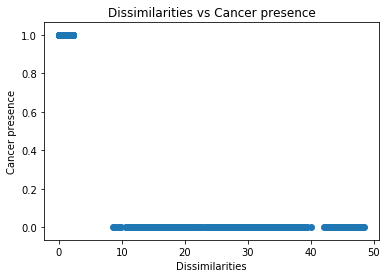

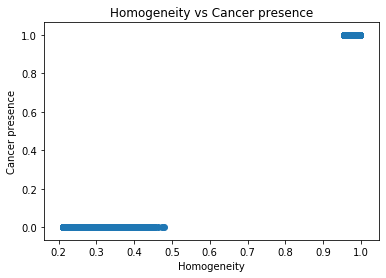

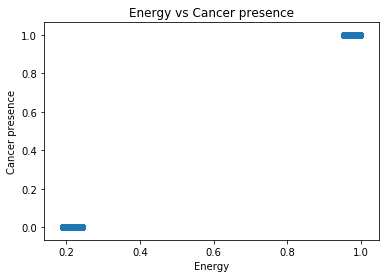

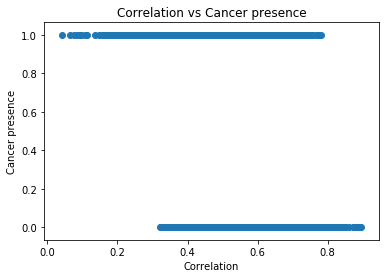

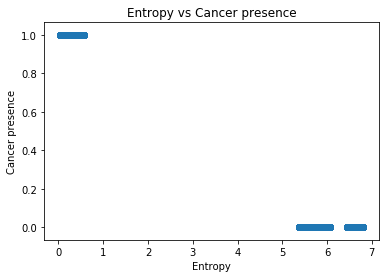

In [11]:
temp = df.columns.values.tolist()
del temp[0]
for i in temp:
    x = df[i]
    plt.scatter(x, y)
    plt.xlabel(i)
    plt.ylabel('Cancer presence')
    plt.title('%s vs Cancer presence'%i)
    plt.show()

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
display(df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy
0,1242.150815,18.451735,0.275983,0.196280,0.736818,6.062398
1,11.620435,0.184760,0.993709,0.993382,0.162172,0.083373
2,10.341931,0.156209,0.995845,0.995676,0.325800,0.054209
3,20.362988,0.208035,0.996813,0.996773,0.274318,0.040768
4,45.156404,0.622416,0.987022,0.986728,0.634323,0.181018
...,...,...,...,...,...,...
3031,2264.646103,26.529884,0.258415,0.200216,0.588103,6.610301
3032,3268.944577,28.225000,0.272820,0.203750,0.607079,6.799829
3033,2327.483078,32.224370,0.249132,0.227682,0.446238,6.464908
3034,1822.120800,28.438155,0.236792,0.211817,0.571045,6.596727


In [14]:
print(y)

[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

In [17]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

2125 2125
911 911


In [18]:
model = LogisticRegression(solver = 'liblinear', C = 0.05, 
                           multi_class = 'ovr', random_state = 0)

In [19]:
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred = model.predict(x_test)

In [21]:
# accuracy on training set
model.score(x_train, y_train)

1.0

In [ ]:
# Accuracy on testing set
model.score(x_test, y_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

# Decision Tree Algorithm

## Gini Impurity

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
decision_tree = DecisionTreeClassifier()

In [ ]:
print(x_train, y_train)

In [ ]:
decision_tree.fit(x_train, y_train)

In [ ]:
print('Model accuracy : ', decision_tree.score(x_train, y_train))

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree)

In [ ]:
val = decision_tree.predict(x_test)

In [ ]:
print('Predicted Values : ', val)
print('Original Values : ', y_test)

In [ ]:
print('Accuracy on testing data : ',decision_tree.score(x_test, y_test))

In [ ]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, val))

## Entropy

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy')

In [ ]:
decision_tree.fit(x_train, y_train)

In [ ]:
print('Model accuracy : ', decision_tree.score(x_train, y_train))

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree)

In [ ]:
val = decision_tree.predict(x_test)
print('Predicted Values : ', val)
print('Original Values : ', y_test)

In [ ]:
print('Accuracy on testing data : ',decision_tree.score(x_test, y_test))

In [ ]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, val))

# Random Forest Classifier

## Gini Index

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(criterion = 'gini',
                                       n_estimators = 100, 
                                       bootstrap = True,
                                       max_features = 'sqrt')

In [ ]:
random_forest.fit(x_train, y_train)

In [ ]:
print('Accuracy on testing data : ', random_forest.score(x_test, y_test))

In [ ]:
val = random_forest.predict(x_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, val))

## Entropy

In [ ]:
random_forest = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators = 100, 
                                       bootstrap = True,
                                       max_features = 'sqrt')

In [ ]:
random_forest.fit(x_train, y_train)

In [ ]:
print('Accuracy on testing data : ', random_forest.score(x_test, y_test))

In [ ]:
val = random_forest.predict(x_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, val))

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel = 'poly')

In [ ]:
svm.fit(x_train, y_train)

In [ ]:
print('Predicted values for SVM Classifier : ',svm.predict(x_test))

In [ ]:
print('Accuracy of Support Vector Machine : ', svm.score(x_test, y_test))

# Neural network

In [ ]:
from keras import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(6, activation = 'relu', 
                     kernel_initializer = 'random_normal', 
                     input_dim = 5))

In [ ]:
classifier.add(Dense(6, activation = 'relu',
                    kernel_initializer = 'random_normal'))

In [ ]:
classifier.add(Dense(1, activation = 'sigmoid',
                    kernel_initializer = 'random_normal'))

In [ ]:
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
classifier.fit(x_train, y_train, batch_size = 5, epochs = 100)

In [ ]:
model_eval = classifier.evaluate(x_train, y_train)

In [ ]:
print('Accuracy on training set : ', 
      classifier.evaluate(x_train, y_train)[1])
print()
print('Accuracy on Testing set : ', 
      classifier.evaluate(x_train, y_train)[0])

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

In [ ]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, y_pred))